# Seaborn: lineplot

In [1]:
import seaborn as sns
from matplotlib import pyplot as plt

import pandas as pd

Grab parking data from [UCI resource](https://archive.ics.uci.edu/ml/datasets/Parking+Birmingham) with Bash commands and read in as `pandas` DataFrame.

In [3]:
from sklearn.datasets import fetch_openml

bike_sharing = fetch_openml(
    "Bike_Sharing_Demand", version=2, as_frame=True
)
df = bike_sharing.frame

In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00482/dataset.zip

--2020-08-12 14:49:33--  https://archive.ics.uci.edu/ml/machine-learning-databases/00482/dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 240539 (235K) [application/x-httpd-php]
Saving to: ‘dataset.zip’

dataset.zip         100%[===================>] 234.90K   545KB/s    in 0.4s    

2020-08-12 14:49:34 (545 KB/s) - ‘dataset.zip’ saved [240539/240539]



In [3]:
!unzip dataset.zip

Archive:  dataset.zip
  inflating: dataset.csv             


In [4]:
df = pd.read_csv('dataset.csv', parse_dates=[3])

In [4]:
df.head()

,season,year,month,hour,holiday,weekday,workingday,weather,temp,feel_temp,humidity,windspeed,count
0,spring,0.0,1.0,0.0,False,6.0,False,clear,9.84,14.395,0.81,0.0,16.0
1,spring,0.0,1.0,1.0,False,6.0,False,clear,9.02,13.635,0.80,0.0,40.0
2,spring,0.0,1.0,2.0,False,6.0,False,clear,9.02,13.635,0.80,0.0,32.0
3,spring,0.0,1.0,3.0,False,6.0,False,clear,9.84,14.395,0.75,0.0,13.0
4,spring,0.0,1.0,4.0,False,6.0,False,clear,9.84,14.395,0.75,0.0,1.0


In [5]:
# Convert year from 0.0, 1.0, etc. to 2011, 2012, etc.
df['year'] = (df['year'] + 2019).astype(int)

# Create a combined 'date' column in 'yyyy-mm' format
df['date'] = pd.to_datetime(df[['year', 'month']].assign(DAY=1))

In [62]:
df[['weekday']].value_counts()

weekday
6.0        2512
0.0        2502
5.0        2487
1.0        2479
3.0        2475
4.0        2471
2.0        2453
dtype: int64

Do a bit of data cleaning: 
- Rename some columns 
- Create three new date/time columns for later aggregations
- Filter down to only two garage locations

In [6]:
df.rename(columns={'SystemCodeNumber': 'Location', 'LastUpdated': 'Timestamp'}, inplace=True)
df['Day'] = df.Timestamp.dt.date
df['Month'] = df.Timestamp.dt.month
df['Hour'] = df.Timestamp.dt.hour

In [7]:
park = df[df.Location.isin(['Broad Street', 'NIA South'])]

In [8]:
park.head()

,Location,Capacity,Occupancy,Timestamp,Day,Month,Hour
20171,Broad Street,690,178,2016-10-04 07:59:42,2016-10-04,10,7
20172,Broad Street,690,269,2016-10-04 08:25:42,2016-10-04,10,8
20173,Broad Street,690,415,2016-10-04 08:59:42,2016-10-04,10,8
20174,Broad Street,690,530,2016-10-04 09:32:46,2016-10-04,10,9
20175,Broad Street,690,600,2016-10-04 09:59:48,2016-10-04,10,9


## Intro Visuals

In [9]:
blue, orange, green, red = sns.color_palette()[:4]

In [49]:
# 設定初始環境變數 
sns.set_style('whitegrid')
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('axes', labelsize=20)  # This will set the size for both x and y labels
plt.rc('date.autoformatter', day='%b %Y')

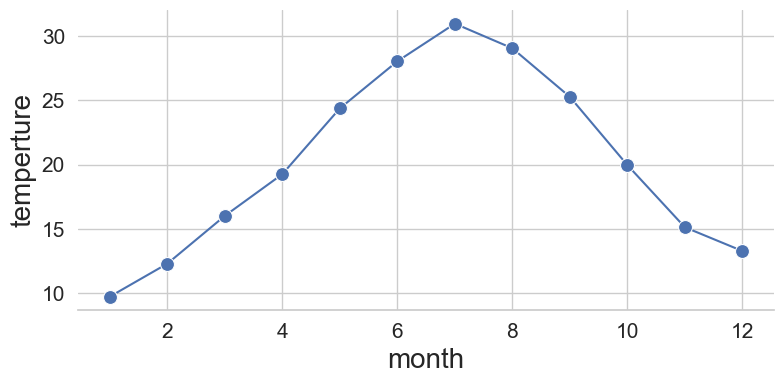

In [54]:
plt.figure(figsize=(8,4))
sns.lineplot(x = df.month, y = df.temp, errorbar=None, marker="o", markersize=10)

sns.despine(left=True)
plt.xlabel('month')
plt.ylabel('temperture')
plt.tight_layout();


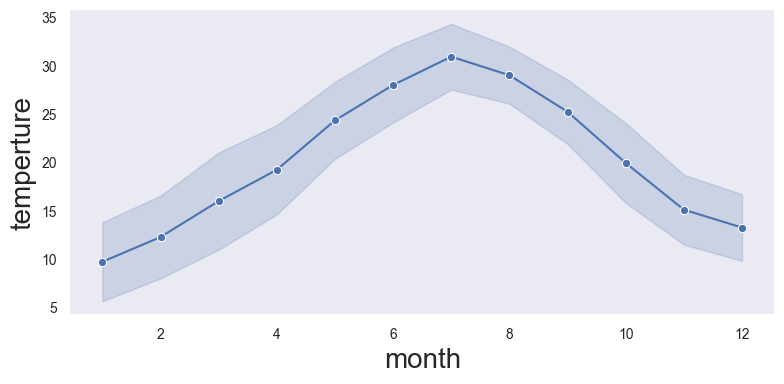

In [76]:
plt.figure(figsize=(8,4))
sns.lineplot(x = df.month, y = df.temp, errorbar="sd", marker='o') # Use standard deviation as error bars

sns.despine(left=True)
plt.xlabel('month')
plt.ylabel('temperture')
plt.tight_layout();


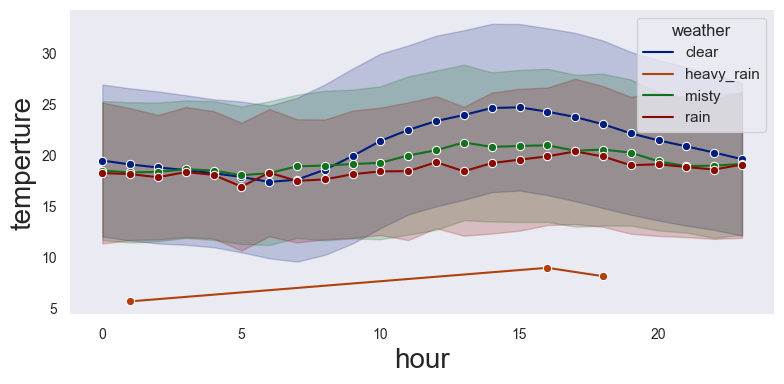

In [77]:
plt.figure(figsize=(8,4))
sns.lineplot(x = df.hour, y = df.temp, hue=df.weather, errorbar="sd", marker='o', palette='dark') # Use standard deviation as error bars

sns.despine(left=True)
plt.xlabel('hour')
plt.ylabel('temperture')
plt.tight_layout();



In [73]:
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## Basics

In [109]:
sns.set_style('whitegrid')

## Bootstrapping

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   season      17379 non-null  category      
 1   year        17379 non-null  int32         
 2   month       17379 non-null  float64       
 3   hour        17379 non-null  float64       
 4   holiday     17379 non-null  category      
 5   weekday     17379 non-null  float64       
 6   workingday  17379 non-null  category      
 7   weather     17379 non-null  category      
 8   temp        17379 non-null  float64       
 9   feel_temp   17379 non-null  float64       
 10  humidity    17379 non-null  float64       
 11  windspeed   17379 non-null  float64       
 12  count       17379 non-null  float64       
 13  date        17379 non-null  datetime64[ns]
dtypes: category(4), datetime64[ns](1), float64(8), int32(1)
memory usage: 1.3 MB


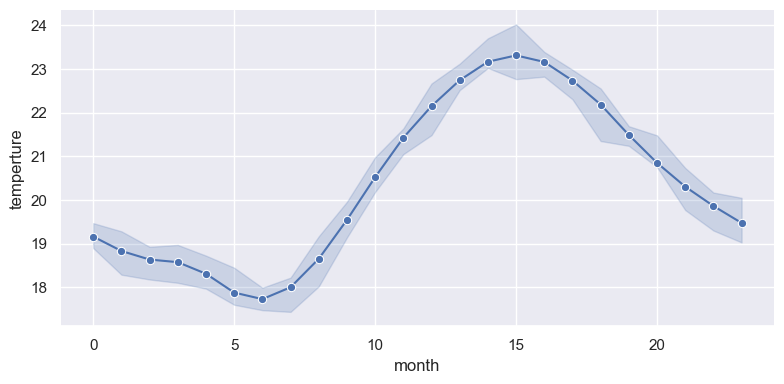

In [146]:
plt.figure(figsize=(8,4))
plt.rc('date.autoformatter', day='%b 1st')

sns.lineplot(x = df.hour, y = df.temp, marker='o', n_boot=10) # Use standard deviation as error bars

sns.despine(left=True)
plt.xlabel('month')
plt.ylabel('temperture')
plt.tight_layout();



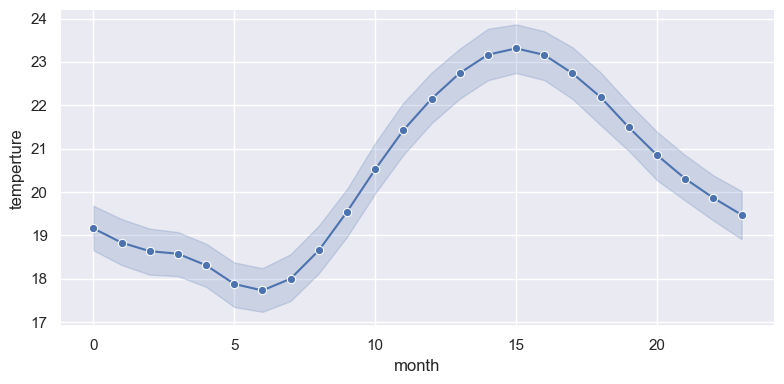

In [147]:
plt.figure(figsize=(8,4))
plt.rc('date.autoformatter', day='%b 1st')

sns.lineplot(x = df.hour, y = df.temp, marker='o', n_boot=1000) # Use standard deviation as error bars

sns.despine(left=True)
plt.xlabel('month')
plt.ylabel('temperture')
plt.tight_layout();



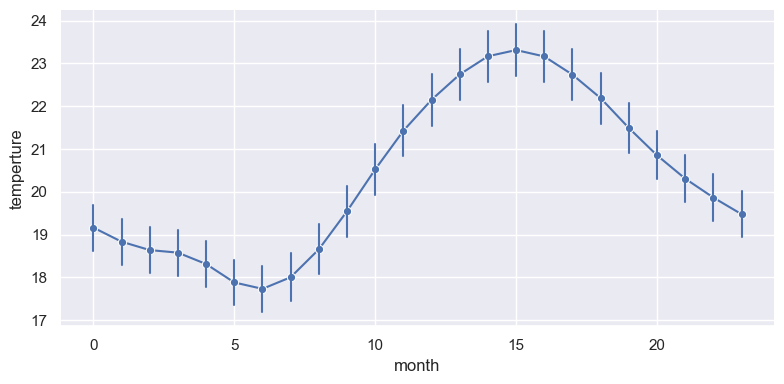

In [156]:
plt.figure(figsize=(8,4))
plt.rc('date.autoformatter', day='%b 1st')

sns.lineplot(x = df.hour, y = df.temp, marker='o', err_style="bars", errorbar=('se', 2))

sns.despine(left=True)
plt.xlabel('month')
plt.ylabel('temperture')
plt.tight_layout();



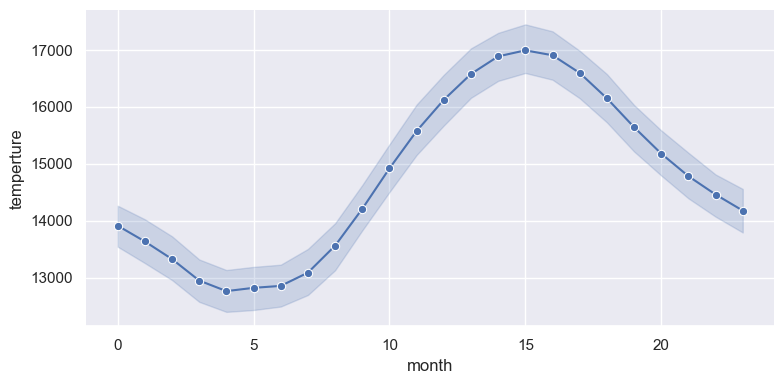

In [157]:
plt.figure(figsize=(8,4))
plt.rc('date.autoformatter', day='%b 1st')

sns.lineplot(x = df.hour, y = df.temp, marker='o', estimator='sum')

sns.despine(left=True)
plt.xlabel('month')
plt.ylabel('temperture')
plt.tight_layout();


## Visual Semantics

### hue

In [158]:
df

,season,year,month,hour,holiday,weekday,workingday,weather,temp,feel_temp,humidity,windspeed,count,date
0,spring,2019,1.0,0.0,False,6.0,False,clear,9.84,14.395,0.81,0.0000,16.0,2019-01-01
1,spring,2019,1.0,1.0,False,6.0,False,clear,9.02,13.635,0.80,0.0000,40.0,2019-01-01
2,spring,2019,1.0,2.0,False,6.0,False,clear,9.02,13.635,0.80,0.0000,32.0,2019-01-01
3,spring,2019,1.0,3.0,False,6.0,False,clear,9.84,14.395,0.75,0.0000,13.0,2019-01-01
4,spring,2019,1.0,4.0,False,6.0,False,clear,9.84,14.395,0.75,0.0000,1.0,2019-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,spring,2020,12.0,19.0,False,1.0,True,misty,10.66,12.880,0.60,11.0014,119.0,2020-12-01
17375,spring,2020,12.0,20.0,False,1.0,True,misty,10.66,12.880,0.60,11.0014,89.0,2020-12-01
17376,spring,2020,12.0,21.0,False,1.0,True,clear,10.66,12.880,0.60,11.0014,90.0,2020-12-01
17377,spring,2020,12.0,22.0,False,1.0,True,clear,10.66,13.635,0.56,8.9981,61.0,2020-12-01


Text(0, 0.5, 'temperture')

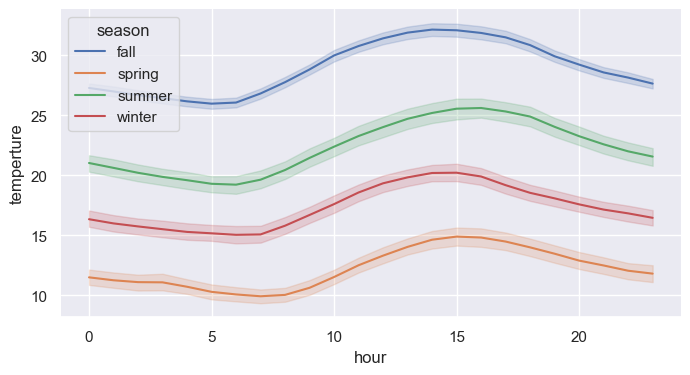

In [159]:
plt.figure(figsize=(8,4))
sns.lineplot(x = df.hour, y = df.temp, hue=df.season)

sns.despine(left=True)
plt.xlabel('hour')
plt.ylabel('temperture')

Text(0, 0.5, 'temperture')

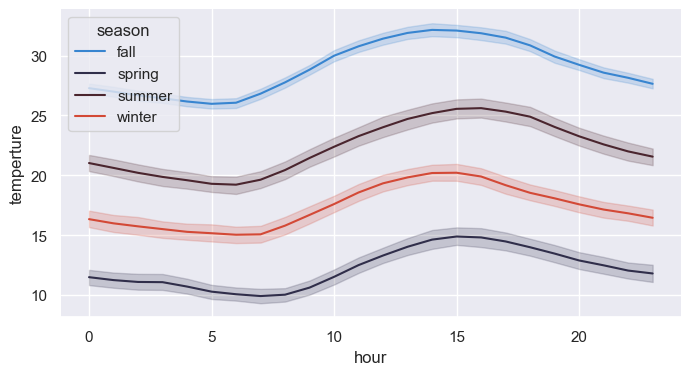

In [160]:
plt.figure(figsize=(8,4))
sns.lineplot(x = df.hour, y = df.temp, hue=df.season, palette = "icefire") 

sns.despine(left=True)
plt.xlabel('hour')
plt.ylabel('temperture')

### style

In [163]:
df

,season,year,month,hour,holiday,weekday,workingday,weather,temp,feel_temp,humidity,windspeed,count,date
0,spring,2019,1.0,0.0,False,6.0,False,clear,9.84,14.395,0.81,0.0000,16.0,2019-01-01
1,spring,2019,1.0,1.0,False,6.0,False,clear,9.02,13.635,0.80,0.0000,40.0,2019-01-01
2,spring,2019,1.0,2.0,False,6.0,False,clear,9.02,13.635,0.80,0.0000,32.0,2019-01-01
3,spring,2019,1.0,3.0,False,6.0,False,clear,9.84,14.395,0.75,0.0000,13.0,2019-01-01
4,spring,2019,1.0,4.0,False,6.0,False,clear,9.84,14.395,0.75,0.0000,1.0,2019-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,spring,2020,12.0,19.0,False,1.0,True,misty,10.66,12.880,0.60,11.0014,119.0,2020-12-01
17375,spring,2020,12.0,20.0,False,1.0,True,misty,10.66,12.880,0.60,11.0014,89.0,2020-12-01
17376,spring,2020,12.0,21.0,False,1.0,True,clear,10.66,12.880,0.60,11.0014,90.0,2020-12-01
17377,spring,2020,12.0,22.0,False,1.0,True,clear,10.66,13.635,0.56,8.9981,61.0,2020-12-01


Text(0, 0.5, 'temperture')

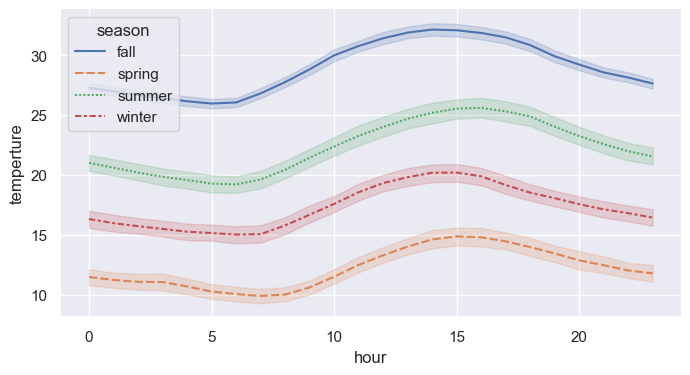

In [169]:
plt.figure(figsize=(8,4))
sns.lineplot(x = df.hour, y = df.temp, hue=df.season, style=df.season) 

sns.despine(left=True)
plt.xlabel('hour')
plt.ylabel('temperture')

Text(0, 0.5, 'temperture')

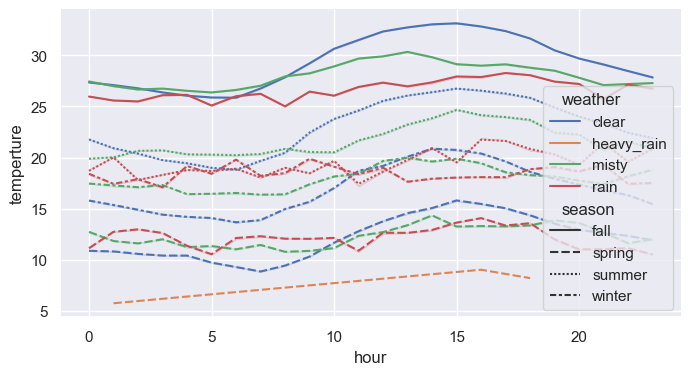

In [172]:
plt.figure(figsize=(8,4))
sns.lineplot(x = df.hour, y = df.temp, hue=df.weather, style=df.season, errorbar=('ci', 0)) 

sns.despine(left=True)
plt.xlabel('hour')
plt.ylabel('temperture')

### size

Text(0, 0.5, 'temperture')

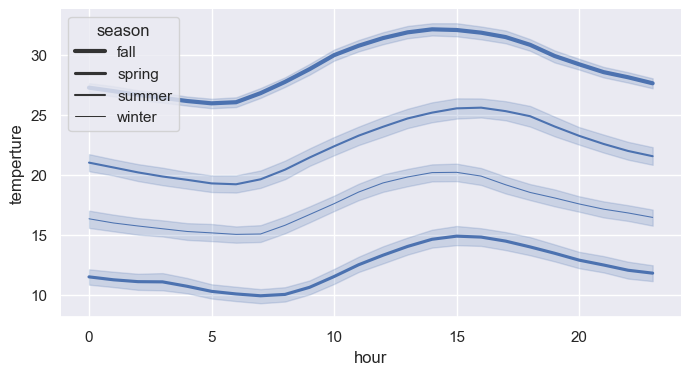

In [173]:
plt.figure(figsize=(8,4))
sns.lineplot(x = df.hour, y = df.temp, size=df.season) 

sns.despine(left=True)
plt.xlabel('hour')
plt.ylabel('temperture')

C:\Users\xdxd2\AppData\Local\Temp\ipykernel_30572\1033244601.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x = df.hour, y = df.temp, size=df.season, ci=None)


Text(0, 0.5, 'temperture')

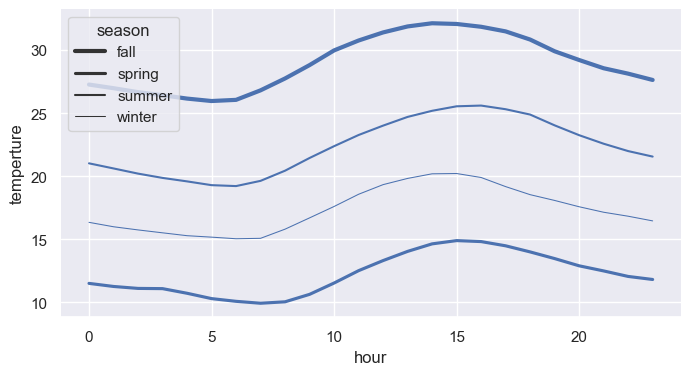

In [174]:
plt.figure(figsize=(8,4))
sns.lineplot(x = df.hour, y = df.temp, size=df.season, ci=None) 

sns.despine(left=True)
plt.xlabel('hour')
plt.ylabel('temperture')

## Style

Most of matplotlib's line styling works within the Seaborn lineplot.  (The main exception is that `linestyle` does not work.)

C:\Users\xdxd2\AppData\Local\Temp\ipykernel_30572\1595919042.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x = df.hour, y = df.temp, ci=None, color="red", lw = 10)


Text(0, 0.5, 'temperture')

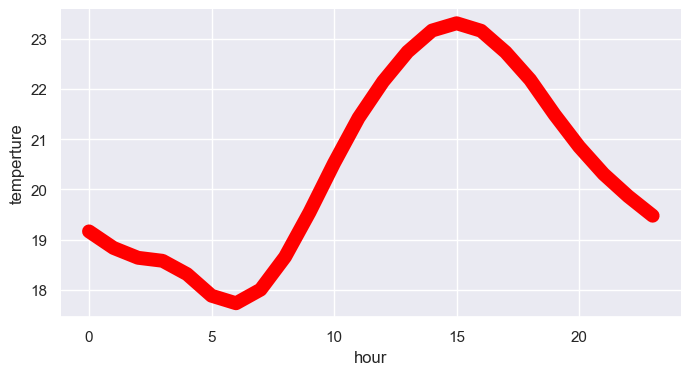

In [177]:
plt.figure(figsize=(8,4))
sns.lineplot(x = df.hour, y = df.temp, ci=None, color="red", lw = 10) 

sns.despine(left=True)
plt.xlabel('hour')
plt.ylabel('temperture')